# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression

# Load Data

In [2]:
df = pd.read_csv("advertising.csv")

In [3]:
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


# Exploring the Dataset

In [4]:
df.shape

(200, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
df.duplicated().sum()

0

# Exploratory Data Analysis (EDA)

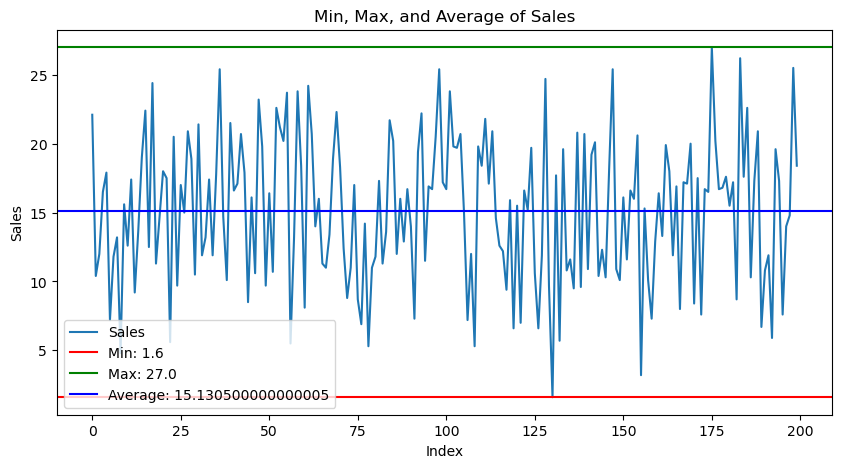

In [8]:
min_val = df['Sales'].min()
max_val = df['Sales'].max()
avg_val = df['Sales'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(data=df['Sales'], label='Sales')
plt.axhline(y=min_val, color='r', linestyle='-', label=f'Min: {min_val}')
plt.axhline(y=max_val, color='g', linestyle='-', label=f'Max: {max_val}')
plt.axhline(y=avg_val, color='b', linestyle='-', label=f'Average: {avg_val}')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.title('Min, Max, and Average of Sales')
plt.legend()
plt.show()

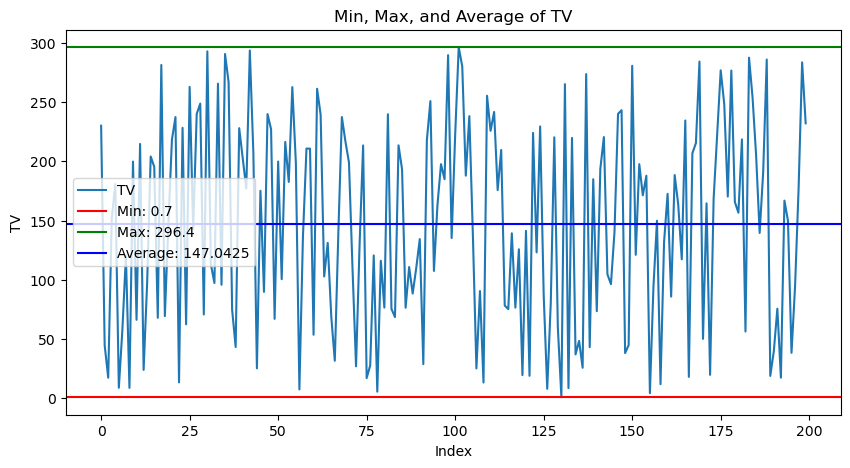

In [9]:
min_val = df['TV'].min()
max_val = df['TV'].max()
avg_val = df['TV'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(data=df['TV'], label='TV')
plt.axhline(y=min_val, color='r', linestyle='-', label=f'Min: {min_val}')
plt.axhline(y=max_val, color='g', linestyle='-', label=f'Max: {max_val}')
plt.axhline(y=avg_val, color='b', linestyle='-', label=f'Average: {avg_val}')
plt.xlabel('Index')
plt.ylabel('TV')
plt.title('Min, Max, and Average of TV')
plt.legend()
plt.show()

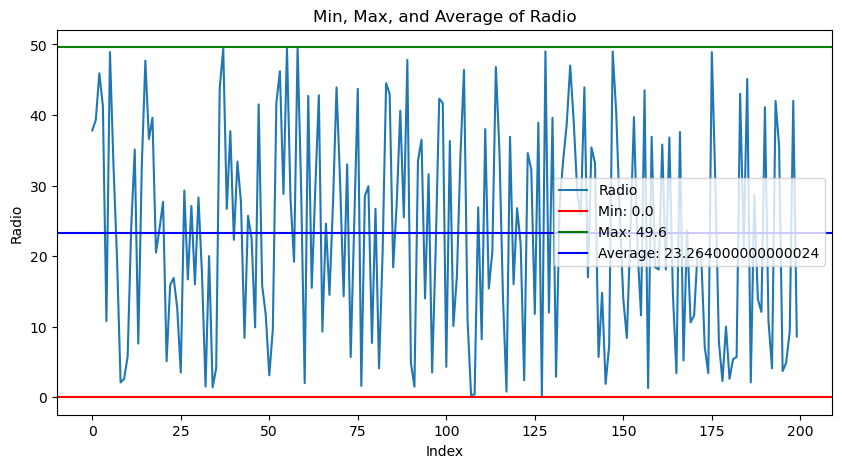

In [10]:
min_val = df['Radio'].min()
max_val = df['Radio'].max()
avg_val = df['Radio'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(data=df['Radio'], label='Radio')
plt.axhline(y=min_val, color='r', linestyle='-', label=f'Min: {min_val}')
plt.axhline(y=max_val, color='g', linestyle='-', label=f'Max: {max_val}')
plt.axhline(y=avg_val, color='b', linestyle='-', label=f'Average: {avg_val}')
plt.xlabel('Index')
plt.ylabel('Radio')
plt.title('Min, Max, and Average of Radio')
plt.legend()
plt.show()

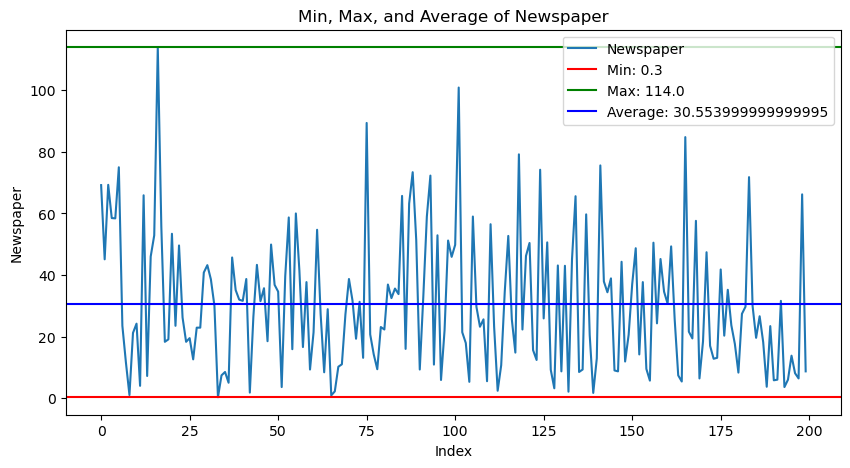

In [11]:
min_val = df['Newspaper'].min()
max_val = df['Newspaper'].max()
avg_val = df['Newspaper'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(data=df['Newspaper'], label='Newspaper')
plt.axhline(y=min_val, color='r', linestyle='-', label=f'Min: {min_val}')
plt.axhline(y=max_val, color='g', linestyle='-', label=f'Max: {max_val}')
plt.axhline(y=avg_val, color='b', linestyle='-', label=f'Average: {avg_val}')
plt.xlabel('Index')
plt.ylabel('Newspaper')
plt.title('Min, Max, and Average of Newspaper')
plt.legend()
plt.show()

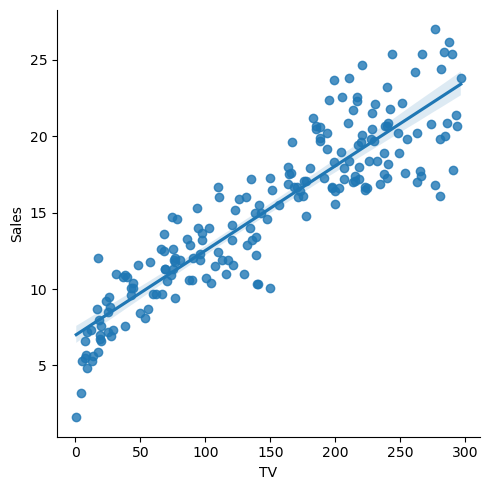

In [12]:
sns.lmplot(x = "TV", y = "Sales", data = df)

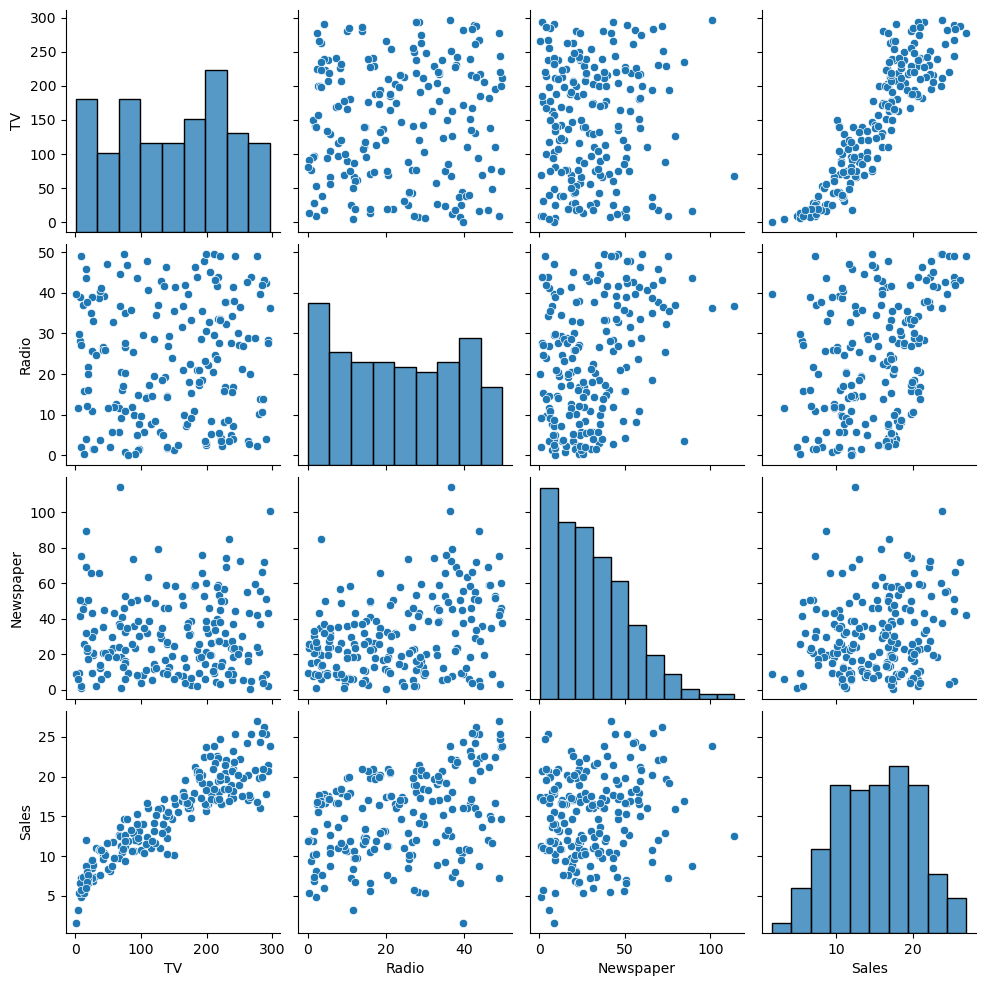

In [13]:
sns.pairplot(df)

<AxesSubplot:>

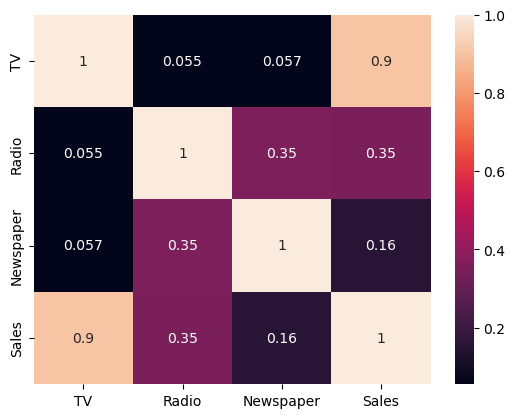

In [14]:
sns.heatmap(df.corr(), annot = True)

The data showed varying distributions of expenditures across TV, Radio, and Newspaper. TV had the highest average expenditure, followed by Radio and Newspaper.

Pair plots and correlation heatmaps revealed that TV and Radio have a stronger correlation with Sales compared to Newspaper.

In [15]:
minmax = MinMaxScaler()
df["TV"] = minmax.fit_transform(df[["TV"]])
df["Newspaper"] = minmax.fit_transform(df[["Newspaper"]])
df["Radio"] = minmax.fit_transform(df[["Radio"]])

# Model Training and Evaluation

In [16]:
X = df.iloc[:, :3]
y = df.iloc[:,-1]

In [17]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 41)

In [18]:
def r2Score(y,yp):
    ymean = y.mean()
    num = np.sum((y-yp))**2
    denom = np.sum((y - ymean)**2)
    return num/denom 

# Random Forest Regressor

In [19]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)
y_pred_forest =  forest.predict(X_test)
print("Score on Training Set", forest.score(X_train,y_train))
print("Score on Testing Set", forest.score(X_test,y_test))
print("r2Score", r2Score(y_test,y_pred_forest))

Score on Training Set 0.9931471386429863
Score on Testing Set 0.9311631134614385
r2Score 0.004228688235499354


# Linear Regression

In [20]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr =  lr.predict(X_test)
print("Score on Training Set", lr.score(X_train,y_train))
print("Score on Testing Set", lr.score(X_test,y_test))
print("r2Score", r2Score(y_test,y_pred_lr))

Score on Training Set 0.9062406975121313
Score on Testing Set 0.88236354508581
r2Score 0.1543254051370775


In [21]:
lr.coef_

array([16.30309701,  5.71257781, -0.08196008])

In [22]:
lr.intercept_

4.471970101226473

# Decision Tree Regressor 

In [23]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_pred_tree =  tree.predict(X_test)
print("Score on Training Set", tree.score(X_train,y_train))
print("Score on Testing Set", tree.score(X_test,y_test))
print("r2Score", r2Score(y_test,y_pred_tree))

Score on Training Set 1.0
Score on Testing Set 0.9482551359870193
r2Score 0.052880251564599905


# Model Comparison 

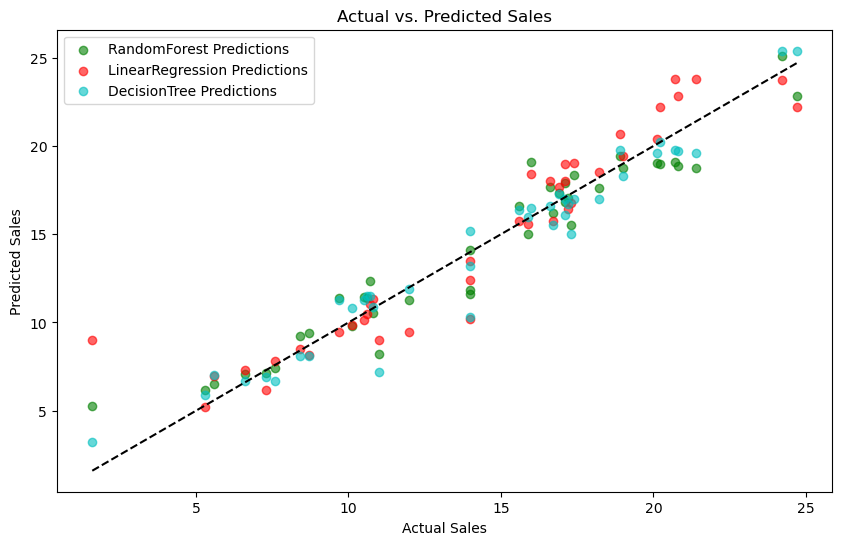

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_forest, color='g', alpha=0.6, label='RandomForest Predictions')
plt.scatter(y_test, y_pred_lr, color='r', alpha=0.6, label='LinearRegression Predictions')
plt.scatter(y_test, y_pred_tree, color='c', alpha=0.6, label='DecisionTree Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='k', linestyle='--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.legend()
plt.show()

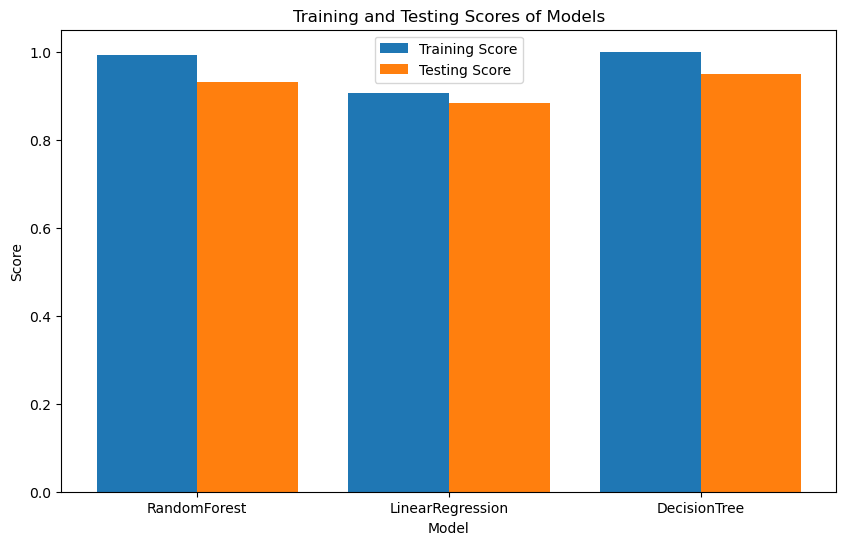

In [25]:
models = ['RandomForest', 'LinearRegression', 'DecisionTree']
train_scores = [forest.score(X_train, y_train), lr.score(X_train, y_train), tree.score(X_train, y_train)]
test_scores = [forest.score(X_test, y_test), lr.score(X_test, y_test), tree.score(X_test, y_test)]

x = np.arange(len(models))

plt.figure(figsize=(10, 6))
plt.bar(x - 0.2, train_scores, 0.4, label='Training Score')
plt.bar(x + 0.2, test_scores, 0.4, label='Testing Score')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Training and Testing Scores of Models')
plt.xticks(x, models)
plt.legend()
plt.show()

 # Conclusion
 
RandomForestRegressor performed the best among the three models, with the highest R² score on both training and testing sets. This indicates that the Random Forest model is better at capturing the non-linear relationships in the data.

LinearRegression showed decent performance but had a slightly lower R² score compared to RandomForestRegressor. This suggests that while the linear model captures the general trend, it might miss some of the complex interactions between features.

DecisionTreeRegressor showed good performance on the training set but lower performance on the testing set, indicating overfitting. This model might be capturing noise in the training data rather than the underlying pattern.

The scatter plot of actual vs. predicted sales showed that RandomForestRegressor had the best alignment with the actual sales values, while LinearRegression and DecisionTreeRegressor showed more variance.